In [1]:
#Installing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing the csv files. To avoid error, use 'Unicode Escape'
df = pd.read_csv('D:/SHIVAM/Imarticus-PGA/Self-Study (Extra)/Five Days- Five Projects/Day 2-Data (Sales) Analysis using Python-EDA/Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
#Checking shape of data
df.shape

(11251, 15)

In [4]:
#Check contents of data frame
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [11]:
#lets drop the blank unwanted columns, where axis=1 represents that we have to drop column otherwise 0 for row. Inplace=True means changes will made in the current dataframe or else if false changes will be made in a copy of the dataframe.
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [12]:
#checking dataframe again after removing the columns
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [13]:
#Lets check if there are any null values or not. And if there, the sum of the same.
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
#Dropping the null values
df.dropna(inplace=True)

In [15]:
#Lets confirm if there are any null values or not.
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [16]:
#changing the amount datatype as integer from float
df['Amount'] = df['Amount'].astype(int)

In [17]:
#Checking datatype of amount column
df['Amount'].dtype

dtype('int32')

# Exploratory Data Analysis

In [18]:
#Now we will start exploratory data analysis. So we will need all the column names.
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

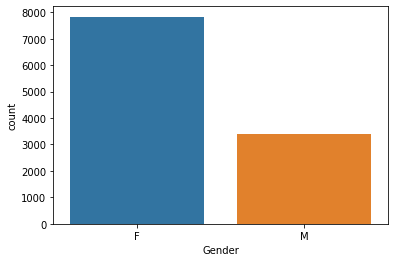

In [20]:
#Lets check orders by gender. Here, we can conclude females do more shopping.
ax = sns.countplot(x='Gender', data=df)

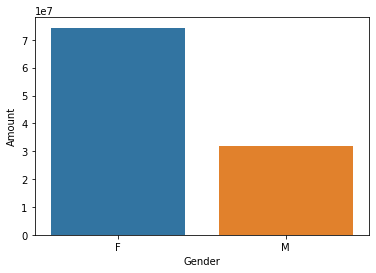

In [22]:
#Sum of sales by gender. Here, we can conclude females do more shopping.
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

### From above graphs, we can observe that most of the buyers are females and even the purchasing power of females are greater than men.

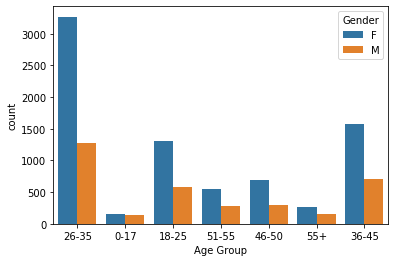

In [24]:
#Lets check orders by age. Here we can observe that age group between 26-35 does the most shopping, especially females.
ax = sns.countplot(data=df,x='Age Group',hue='Gender')

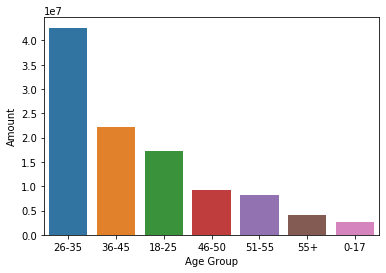

In [26]:
#Lets find total amount vs Age group
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group', y='Amount',data= sales_age)

### From the above graph, we can see that most of the buyers are of age group between 26-35 yrs, female.

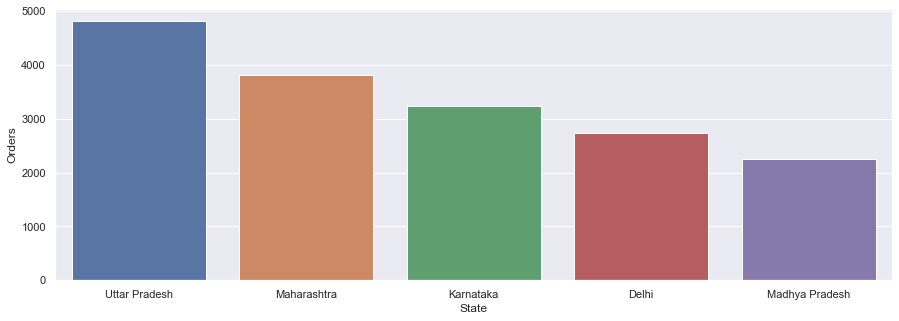

In [48]:
#Lets check top 5 states by order.
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders')

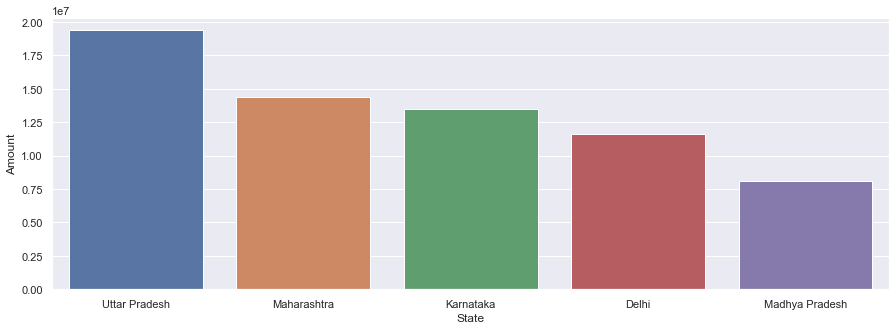

In [49]:
#Lets check top 5 states by amount/sales.
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Amount')

### From above graphs, we can observe that most of the orders are from Uttar Pradesh, Maharashtra and Karnataka.

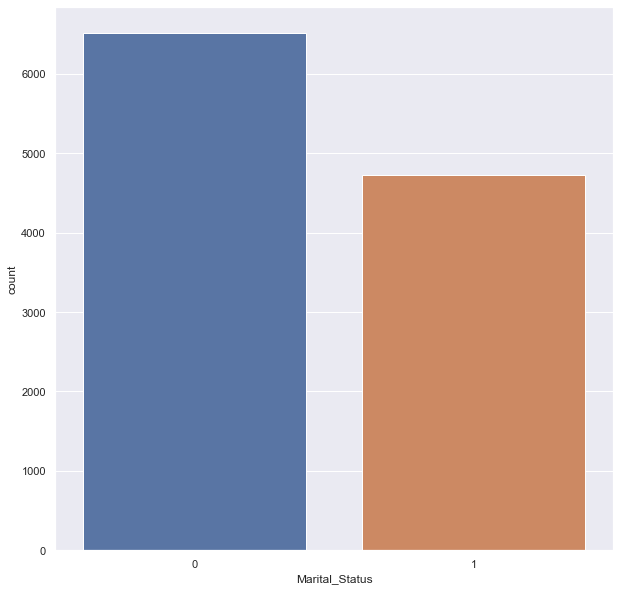

In [54]:
#Lets check orders by marital status.
ax = sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})

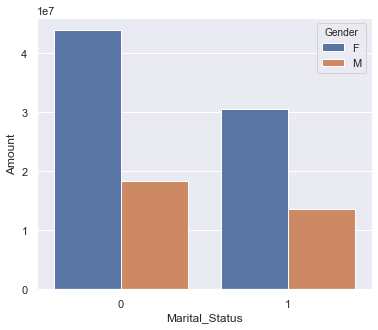

In [56]:
#Lets check amount/sales by marital status.
sales_state = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

### From above graphs, we can observe that most of the buyers are married (women) and they have high purchasing power.

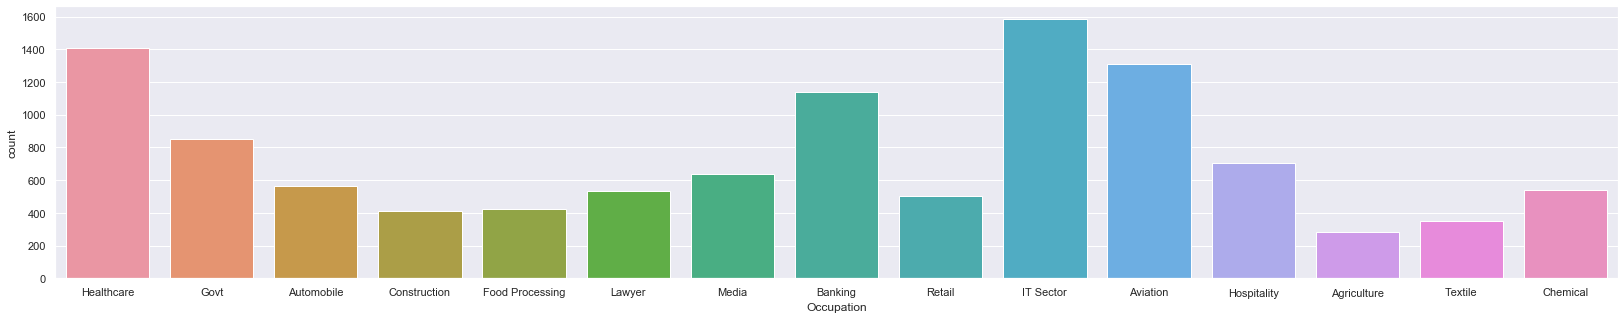

In [63]:
#Lets check orders by occupation.
ax = sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize':(28,5)})

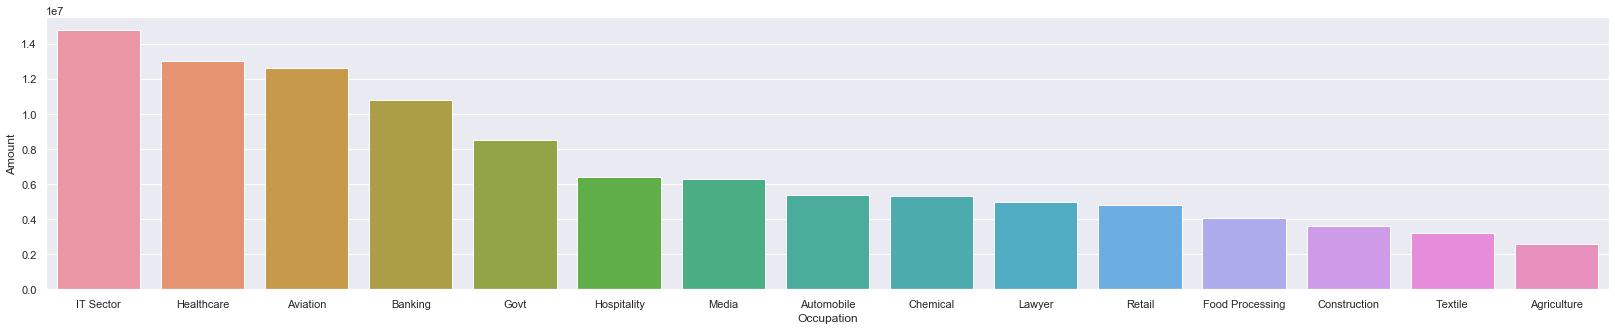

In [68]:
#Lets check amount/sales by occupation.
sales_state = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(28,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')

### From above graphs, we can observe that most of the buyers are from IT, Healthcare and Aviation sector.

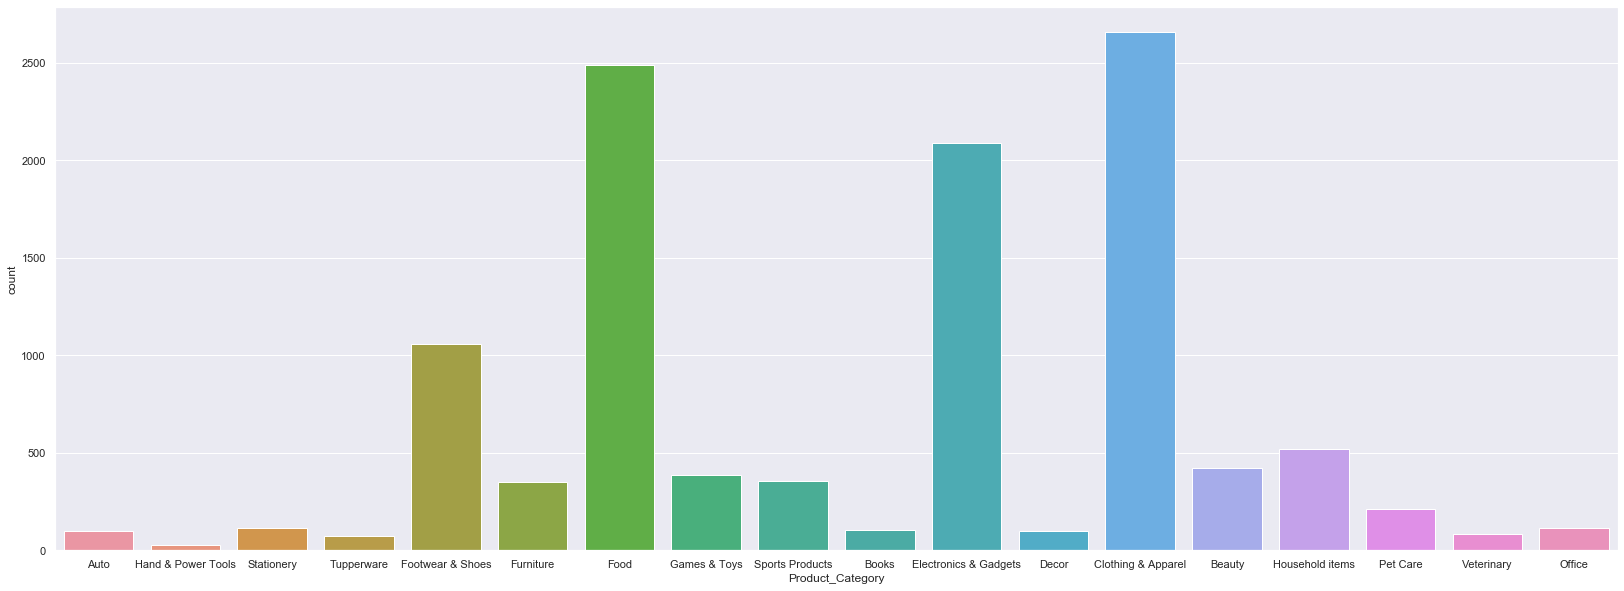

In [81]:
#Lets check orders by product category
ax = sns.countplot(data=df,x='Product_Category')
sns.set(rc={'figure.figsize':(28,16)})

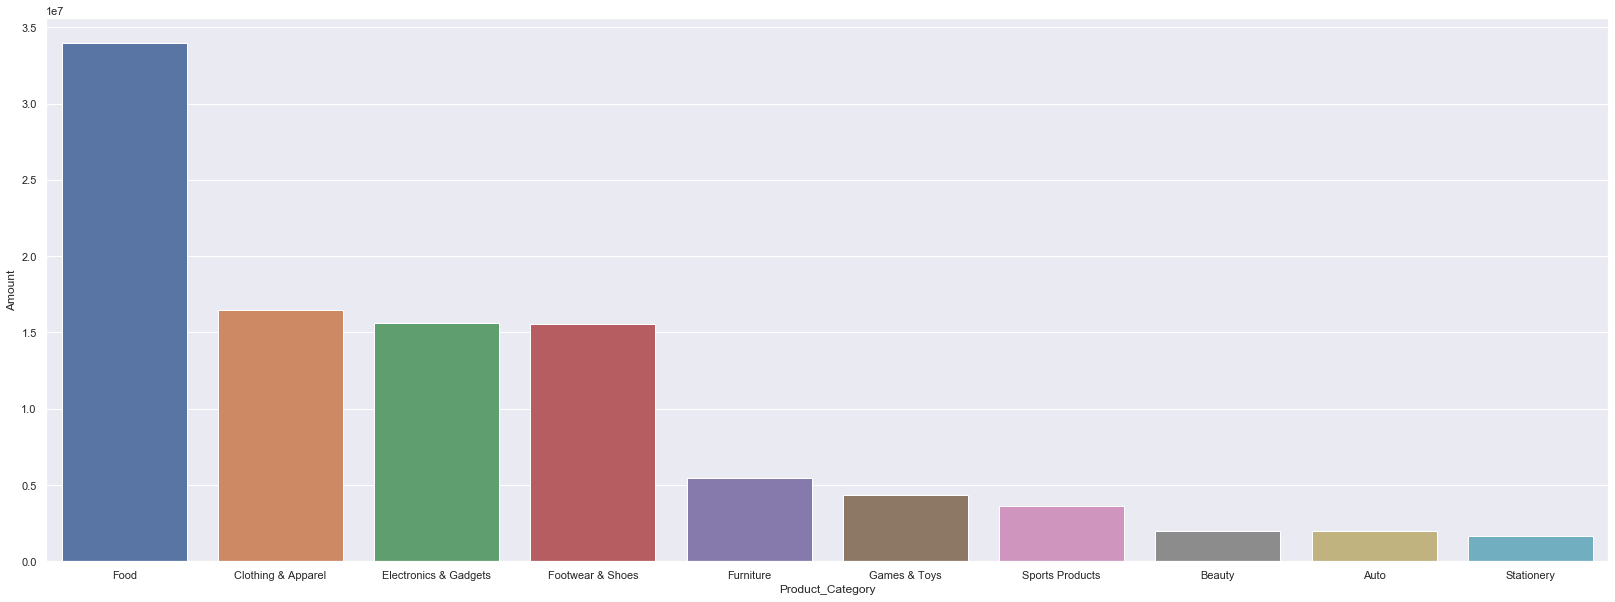

In [80]:
#Lets check amount/sales by product category.
sales_state = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(28,10)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount')

### From the above graphs, we can observe that Clothing & Apparel, Food and Electronics & Gadgets generate the most of the orders. But most of the revenue or sales amount comes from Food, clothing & Apparel and Electronics & Gadgets.

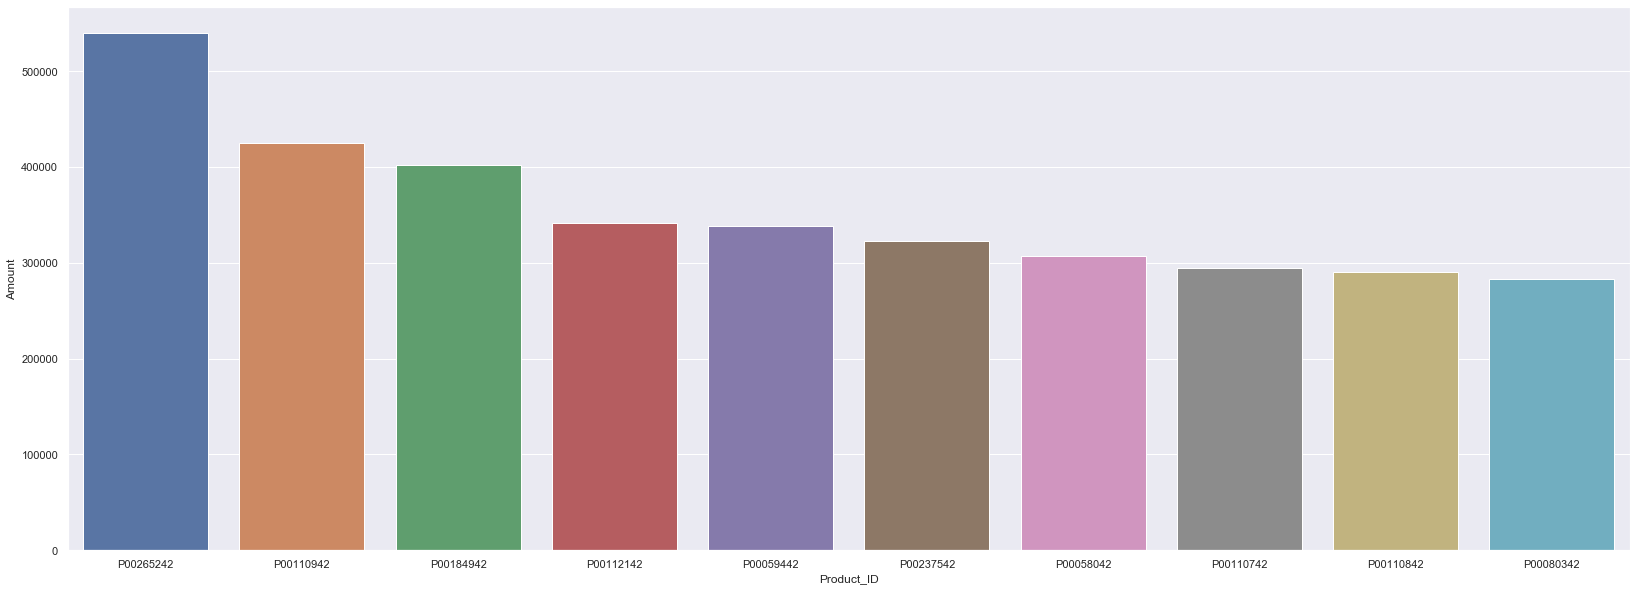

In [79]:
#Lets check amount/sales by product ID.
sales_state = df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(28,10)})
sns.barplot(data=sales_state,x='Product_ID',y='Amount')

# Conclusion:

### Married women from the age group 26-35 years from Uttar Pradesh, Maharashtra & Karnataka working in IT sector, Healthcare & Aviation are more likely to buy products from Food, Clothing & Apparel and Electronics & Gadgets category.